In [1]:
import tweepy
import json
import pandas as pd
from perspective import PerspectiveAPI
from googleapiclient import discovery
import numpy as np
import re
import time
import sys
import matplotlib.pyplot as plt
from numpy import nanmedian

import matplotlib.dates as mdates
path_utils = 'C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/tweet_utils'
sys.path.append(path_utils)
import utils
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")
path_files ="C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Italian/Files/"
path_data = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Italian/Files/Tweets/"

In [2]:
jsonFile = open(path_files + 'auth.json', 'r')
config = json.load(jsonFile)
jsonFile.close()
API_KEY = config["api_key_1"]

# Clean text and write

In [6]:
strng = "@Cristiano è il nostro #MVP? si: https://google.com"

In [41]:
def clean(x: str):
    if ("http" in x):
        x = re.sub(r'http\S+', '',x)
    x = re.sub('[@#$]', '', x)
    x = re.sub('\n', ' ', x)
    return x

In [8]:
clean(strng)

'Cristiano è il nostro MVP? si: '

In [2]:
# df_bad = pd.read_csv(path_data + "bad_activities.csv")
# df_good = pd.read_csv(path_data + "good_activities.csv")
# df_suspended = pd.read_parquet(path_data + "tweets_bad_suspended.parquet", engine="fastparquet")
# df_suspended_good= pd.read_parquet(path_data + "tweets_good_suspended.parquet", engine="fastparquet")
tweets = pd.read_parquet(path_data + "tweets.parquet", engine="fastparquet")

In [40]:
# tweets.head()

In [92]:
# x = list(tweets["text"])
# y = list(tweets["id"])
# count = 0
lst_id = []
lst_text = []
for i in tqdm(range(len(x))):
    lst_id.append(y[i])
    lst_text.append(clean(x[i]))
pd.DataFrame(list(zip(lst_id,lst_text)),columns=["id","text"]).to_csv("C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/texts/df_cleaned.csv",
                                                                     line_terminator="\n", encoding="utf-8", index=False)

In [2]:
esempio = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/texts/df_cleaned.csv",
                              lineterminator="\n", low_memory=False, encoding="utf-8")

In [9]:
lst_final = []
x2 = list(set(esempio["text"]))
for i in tqdm(x2[1:]):
    if len(i.split(" ")) >= 4:
        lst_final.append(i)

In [23]:
n = 11
splited = [lst_final[i::n] for i in range(n)]


In [25]:
count = 0
for i in splited:
    pd.DataFrame(i, columns=["text"]).to_csv(f"C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/texts/example_{count}.csv",
                           line_terminator="\n", index=False, encoding="utf-8")
    count = count + 1


In [12]:

# esempio = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/texts/example.csv",
#                               lineterminator="\n", low_memory=False, encoding="utf-8")
# esempio

In [87]:
# print(len(x2))
# count = 0
# for i in x2:
#     if len(i.split(" ")) < 4:
#         count = count + 1
#         print(i)
# print(count)
# 1499124 - 69376
# 1500000 / 50000

In [2]:
# client = discovery.build(
#   "commentanalyzer",
#   "v1alpha1",
#   developerKey=API_KEY,
#   discoveryServiceUrl="https://commentanalyzer.googleapis.com/$discovery/rest?version=v1alpha1",
#   static_discovery=False,
# )

# analyze_request = {
#   'comment': { 'text': "guarda, sei bravo!"},
#   'requestedAttributes': {'TOXICITY': {}}
# }

# response = client.comments().analyze(body=analyze_request).execute()
# print(json.dumps(response, indent=2))

# Ricomposizione DF

In [2]:
tweets = pd.read_parquet(r"../files/tweets/tweets.parquet", engine="fastparquet")[["id",
                                                                                   "user_screen_name",
                                                                                   "text","urls","hashtags",
                                                                                   "created_at", "in_reply_to_screen_name",
                                                                                   "rt_created_at",
                                                                                   "quoted_status_id",
                                                                                   "in_reply_to_user_id"]]

In [3]:
esempio = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Italian/script_directory_output/toxic_texts/df_cleaned.csv",
                              lineterminator="\n", low_memory=False, encoding="utf-8")

In [4]:
df = tweets.merge(esempio, on="id", how="left")
df.head()

,id,user_screen_name,text_x,urls,hashtags,created_at,in_reply_to_screen_name,rt_created_at,quoted_status_id,in_reply_to_user_id,text_y
0,1221739084449832960,planetpaul65,La Memoria è l’unico vaccino contro l’indiffer...,[],"[{'text': 'GiornatadellaMemoria2020', 'indices...",Mon Jan 27 10:17:51 +0000 2020,None,Mon Jan 27 08:15:15 +0000 2020,NaN,NaN,La Memoria è l’unico vaccino contro l’indiffer...
1,1221737155380293640,Grace_1207,"Oggi sono arrivati loro, 3 femminucce e 1 masc...",[],[],Mon Jan 27 10:10:11 +0000 2020,None,Sat Jan 25 21:19:30 +0000 2020,NaN,NaN,"Oggi sono arrivati loro, 3 femminucce e 1 masc..."
2,1221730009989120001,MarisaMinervini,L'indifferenza è più colpevole della violenza ...,[],[],Mon Jan 27 09:41:47 +0000 2020,None,Mon Jan 27 05:00:04 +0000 2020,NaN,NaN,L'indifferenza è più colpevole della violenza ...
3,1221737654909382662,LecceSette,"Minaccia morbillo nel Salento, Asl: ""Vaccinars...","[{'url': 'https://t.co/CY0qiQFk6s', 'expanded_...",[],Mon Jan 27 10:12:10 +0000 2020,None,None,NaN,NaN,"Minaccia morbillo nel Salento, Asl: ""Vaccinars..."
4,1221728980203724801,arual812,"""Coltivare la Memoria è ancora oggi un vaccino...",[],[],Mon Jan 27 09:37:42 +0000 2020,None,Mon Jan 27 07:45:58 +0000 2020,NaN,NaN,"""Coltivare la Memoria è ancora oggi un vaccino..."


In [5]:
print(list(df["text_x"])[0])
print("..")
print(list(df["text_y"])[0])

La Memoria è l’unico vaccino contro l’indifferenza.
(Liliana Segre)
#GiornatadellaMemoria2020 https://t.co/JDF9vdg1P9
..
La Memoria è l’unico vaccino contro l’indifferenza. (Liliana Segre) GiornatadellaMemoria2020 


In [5]:
del tweets
del esempio

In [7]:
import warnings
warnings.simplefilter("ignore")
from glob import glob
files = glob(r"C:\Users\gianl\Desktop\Gi\Supsi\Vaccines_Discussion_Italy\Italian\script_directory_output\toxic_texts\results*.csv")
results = pd.DataFrame()
for file in tqdm(files):
    df_temp = pd.read_csv(file, lineterminator="\n", encoding="utf-8", low_memory=False)
    results = results.append(df_temp)
print(len(results))
results.head()


1513781


,text,toxicity
0,andrea__059 LucioMM1 Rey_k73 MMmarco0 Ma da qu...,0.122449
1,La_manina__ PaoloMarani3 Hai cannato. 1743 so...,0.213626
2,noitre32 Ormai viviamo in mezzo a una follia d...,0.271282
3,"Lotta alla pandemia, Bayer e Curevac insieme p...",0.003002
4,EugenioGiani In molto 60 enni nn si prenotano ...,0.037538


In [8]:
df.columns

Index(['id', 'user_screen_name', 'text_x', 'urls', 'hashtags', 'created_at',
       'in_reply_to_screen_name', 'rt_created_at', 'quoted_status_id',
       'in_reply_to_user_id', 'text_y'],
      dtype='object')

In [9]:
# print(len(df[df["text_y"].notna()]))
df = df[['id', 'user_screen_name', 'text_y', 'urls', 'hashtags', 'created_at',
       'in_reply_to_screen_name', 'rt_created_at', 'quoted_status_id',
       'in_reply_to_user_id']]
df.rename(columns = {'text_y':'text'}, inplace = True)

In [10]:
res = results.merge(df, on="text", how="right")
res.head()

,text,toxicity,id,user_screen_name,urls,hashtags,created_at,in_reply_to_screen_name,rt_created_at,quoted_status_id,in_reply_to_user_id
0,La Memoria è l’unico vaccino contro l’indiffer...,0.006942,1221739084449832960,planetpaul65,[],"[{'text': 'GiornatadellaMemoria2020', 'indices...",Mon Jan 27 10:17:51 +0000 2020,None,Mon Jan 27 08:15:15 +0000 2020,NaN,NaN
1,"Oggi sono arrivati loro, 3 femminucce e 1 masc...",0.503896,1221737155380293640,Grace_1207,[],[],Mon Jan 27 10:10:11 +0000 2020,None,Sat Jan 25 21:19:30 +0000 2020,NaN,NaN
2,L'indifferenza è più colpevole della violenza ...,0.037881,1221730009989120001,MarisaMinervini,[],[],Mon Jan 27 09:41:47 +0000 2020,None,Mon Jan 27 05:00:04 +0000 2020,NaN,NaN
3,"Minaccia morbillo nel Salento, Asl: ""Vaccinars...",0.065322,1221737654909382662,LecceSette,"[{'url': 'https://t.co/CY0qiQFk6s', 'expanded_...",[],Mon Jan 27 10:12:10 +0000 2020,None,None,NaN,NaN
4,"""Coltivare la Memoria è ancora oggi un vaccino...",0.004234,1221728980203724801,arual812,[],[],Mon Jan 27 09:37:42 +0000 2020,None,Mon Jan 27 07:45:58 +0000 2020,NaN,NaN


In [11]:
print(len(res))
res["date"] = [utils.process_datetime(i) for i in tqdm(res["created_at"])]

4053201


In [12]:
print(nanmedian(res["toxicity"]))
print(np.nanmean(res["toxicity"]))

0.05653196
0.10761052856596161


Text(0, 0.5, 'Toxicity score')

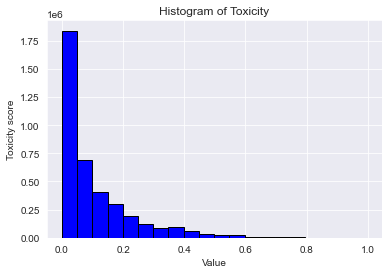

In [19]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(res['toxicity'], color = 'blue', edgecolor = 'black', bins=20)

# Add labels
plt.title('Histogram of Toxicity')
plt.xlabel('Value')
plt.ylabel('Toxicity score')

# User - Toxicity

In [ ]:
res = res[res["toxicity"].notna()]

In [ ]:
len(res)

In [2]:
# res["count_status"] = res.groupby('user_screen_name')["toxicity"].transform('count')
# to_df = res[res["count_status"]>10]
# to_df["toxicity_score"] = to_df.groupby('user_screen_name')["toxicity"].transform('mean')
# to_df = to_df.drop_duplicates(subset='user_screen_name')
# print("Writing...")
# to_df.to_csv(r"../files/tweets/user_toxicity.csv", line_terminator="\n", encoding="utf-8", index=False)
# res.to_csv(r"../files/tweets/tweets_toxicity.csv", line_terminator="\n", encoding="utf-8", index=False)
# print("Cleaning...")
# del res
# del to_df
# print("Reading...")
tweets_toxic = pd.read_csv(r"../files/tweets/tweets_toxicity.csv", lineterminator="\n", encoding="utf-8", low_memory=False)
toxicity_users = pd.read_csv(r"../files/tweets/user_toxicity.csv", lineterminator="\n", encoding="utf-8", low_memory=False)
tweets_toxic

,text,toxicity,id,user_screen_name,urls,hashtags,created_at,in_reply_to_screen_name,rt_created_at,quoted_status_id,in_reply_to_user_id,date,count_status
0,La Memoria è l’unico vaccino contro l’indiffer...,0.006942,1221739084449832960,planetpaul65,[],"[{'text': 'GiornatadellaMemoria2020', 'indices...",Mon Jan 27 10:17:51 +0000 2020,NaN,Mon Jan 27 08:15:15 +0000 2020,NaN,NaN,2020-01-27,238
1,"Oggi sono arrivati loro, 3 femminucce e 1 masc...",0.503896,1221737155380293640,Grace_1207,[],[],Mon Jan 27 10:10:11 +0000 2020,NaN,Sat Jan 25 21:19:30 +0000 2020,NaN,NaN,2020-01-27,286
2,L'indifferenza è più colpevole della violenza ...,0.037881,1221730009989120001,MarisaMinervini,[],[],Mon Jan 27 09:41:47 +0000 2020,NaN,Mon Jan 27 05:00:04 +0000 2020,NaN,NaN,2020-01-27,1
3,"Minaccia morbillo nel Salento, Asl: ""Vaccinars...",0.065322,1221737654909382662,LecceSette,"[{'url': 'https://t.co/CY0qiQFk6s', 'expanded_...",[],Mon Jan 27 10:12:10 +0000 2020,NaN,NaN,NaN,NaN,2020-01-27,90
4,"""Coltivare la Memoria è ancora oggi un vaccino...",0.004234,1221728980203724801,arual812,[],[],Mon Jan 27 09:37:42 +0000 2020,NaN,Mon Jan 27 07:45:58 +0000 2020,NaN,NaN,2020-01-27,616
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907813,Il medico testimonial pro vaccino a Ariachetir...,0.043032,1394609996197937159,CiaoGrosso,[],[],Tue May 18 11:05:08 +0000 2021,NaN,Tue May 18 10:45:35 +0000 2021,NaN,NaN,2021-05-18,506
3907814,"""...«Ha lividi e piastrine basse». E ha richie...",0.045092,1394610015823147011,Rosskitty77,"[{'url': 'https://t.co/5UT12c2sur', 'expanded_...",[],Tue May 18 11:05:13 +0000 2021,NaN,NaN,1.394602e+18,NaN,2021-05-18,1095
3907815,"Vaccinazioni nei luoghi di lavoro, fondamental...",0.007983,1394609887641022464,GuidoIafrate,"[{'url': 'https://t.co/D3j3phCsiC', 'expanded_...",[],Tue May 18 11:04:42 +0000 2021,NaN,NaN,NaN,NaN,2021-05-18,3
3907816,A lariachetira c’è un MEDICO DI BASE che ha ap...,0.317855,1394609899963830275,lucabattanta,[],"[{'text': 'lariachetira', 'indices': [14, 27]}]",Tue May 18 11:04:45 +0000 2021,NaN,Tue May 18 10:36:02 +0000 2021,NaN,NaN,2021-05-18,3025


In [3]:
tweets_toxic['dates']= tweets_toxic[["toxicity","date"]].groupby('date').transform('median')
res_for_plot = tweets_toxic.drop_duplicates(subset='date')
res_for_plot.sort_values(by=["date"], inplace=True)

In [4]:
labels =  []
for i in res_for_plot["created_at"]:
    x = i.split(" ")
    month = x[1]
    day = x[2]
    year = x[5][2:]
    value = day + " " + month + " '" + year
    labels.append(value)

# Timeline

In [5]:
data = res_for_plot[["date","dates"]]
data['rolling_avg'] = data.dates.rolling(14).median()

In [6]:
data

,date,dates,rolling_avg
12673,2020-01-02,0.132518,NaN
1883,2020-01-03,0.065269,NaN
5515,2020-01-04,0.058929,NaN
6279,2020-01-05,0.048526,NaN
7386,2020-01-06,0.077709,NaN
...,...,...,...
3538756,2021-05-19,0.066122,0.047667
3553961,2021-05-20,0.047839,0.048354
3554638,2021-05-21,0.056732,0.049212
3555254,2021-05-22,0.058929,0.049212


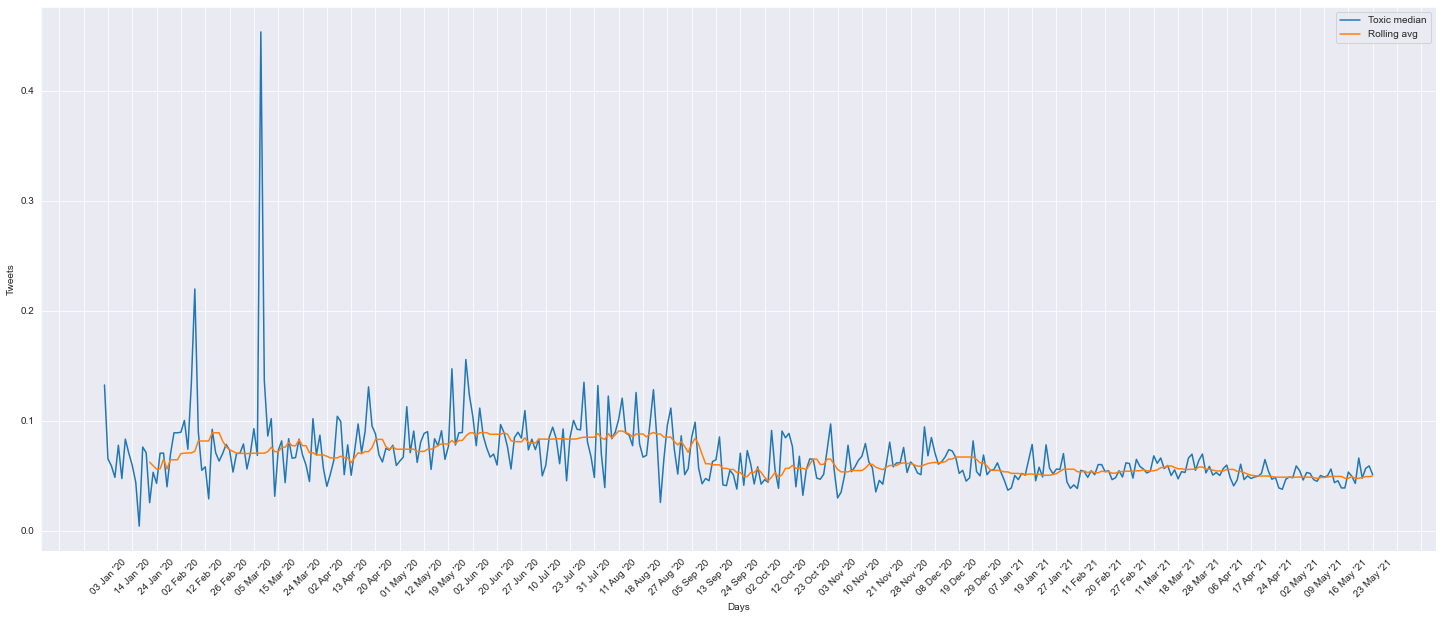

In [9]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(25, 10))
sns.lineplot( x = 'date',
             y = 'dates',
             data = data,
             label = 'Toxic median')
sns.lineplot(x = 'date',
             y = 'rolling_avg',
             data = data,
             label = 'Rolling avg')

plt.xlabel('Days')

pos = list(data["date"])
lab = labels
plt.xticks(pos, lab)
plt.xticks(rotation=45, fontsize = 10)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
# plt.axvline(x="2020-01-30", color="g") # primi casi covid
# plt.axvline(x="2020-02-20", color="g") # primi casi covid italia e chiusure
# plt.axvline(x="2020-03-16", color="g") # prime somministrazionio test vaccino
# plt.axvline(x="2020-06-13", color="g") # primi allentamenti
# plt.axvline(x="2020-10-10", color="g") # restrizioni
# plt.axvline(x="2020-12-21", color="g") # ok aifa per vaccino
# plt.axvline(x="2020-12-27") # vaccine day in europa
# plt.axvline(x="2021-03-15", color="g") # Interruzione AZ
plt.ylabel('Tweets')
plt.show()

# Toxic Users

In [10]:
toxicity_users = toxicity_users[["user_screen_name","count_status","toxicity_score"]]
print(np.median(toxicity_users["toxicity_score"]))
toxicity_users

0.1042210376666666


,user_screen_name,count_status,toxicity_score
0,planetpaul65,238,0.124145
1,Grace_1207,286,0.086385
2,LecceSette,90,0.027492
3,arual812,616,0.066879
4,pvsassone,1734,0.098949
...,...,...,...
46604,AttivaLazio,19,0.078986
46605,martinelegendr4,23,0.090316
46606,GiNews24,16,0.087493
46607,V_M5S_,11,0.025965


In [11]:
toxicity_users[toxicity_users["toxicity_score"]>0.2]

,user_screen_name,count_status,toxicity_score
84,lucianoranieri7,21,0.251855
242,Graziel65255465,1409,0.211457
254,Jo74155327,14,0.225772
262,Jambonet1,32,0.213571
280,Spicci3,28,0.289105
...,...,...,...
46455,Carbonfire10,13,0.218374
46481,piervane,16,0.252010
46544,Mariano06003760,19,0.304589
46550,Pino45373725,11,0.220441


In [12]:
toxic  = tweets_toxic[tweets_toxic["toxicity"]>0.49]

In [13]:
domains = []
for i in utils.extract_domain_list(toxic):
    if i != "[]":
        for j in i:
            if "youtu.be" in j:
                j = "youtube.com"
            domains.append(j)
pd.Series(domains).value_counts().sort_values(ascending=False)[:15]

twitter.com             88758
youtube.com              2646
ansa.it                  1890
ilgiornale.it            1719
corriere.it              1305
lastampa.it              1305
ilfattoquotidiano.it     1215
iltempo.it                972
byoblu.com                936
tgcom24.mediaset.it       792
milano.corriere.it        729
t.co                      666
repubblica.it             594
facebook.com              549
adnkronos.com             531
dtype: int64

In [14]:
pd.Series(toxic["text"]).value_counts().sort_values(ascending=False)[:15]

Fatevi sto cazzo di vaccino e non iniziate a rompere i coglioni                                                                                                                                                                                                                             1914
Tarro suggerisce il plasma: lo diffamano. Dedonno lo usa e ottiene zero morti a Mantova: gli mandano i NAS. Conte tace sul plasma e supporta BillGates. Bergoglio prega per i vaccini. I virologi-tv chiedono segregazione fino ai vaccini. Non capite il nesso? Siete coglioni.            1094
Sono passati esattamente 10 anni. Gentile beppe_grillo, noi lo sapevamo già, ma a te davvero serviva un'epidemia del genere per capire quante cazzate hai sparato? Coronaviriusitalia vaccini                                                                                                649
È pazzesco. La gente è scesa in piazza a Montecitorio, a Milano, ovunque.  Una rivolta popolare per riottenere le libertà economiche 

In [15]:
communities = pd.read_csv(r"..\Files\networks\louvain.csv")

In [16]:
toxic_merged = toxic.merge(communities, left_on="user_screen_name", right_on="name", how="left")

In [17]:
value = pd.Series(toxic_merged["community"]).value_counts().sort_values(ascending=False)
count = 0
total_values = np.sum(value)
for i in value.index:
    print(str(i) + " - " + str(value[i]) + f" - {round(value[i]/total_values,2)*100}% of total")
    count = count + 1
    if count == 14:
        break
# 4 right
# 0 left
# 2 influencer
# 3 journals

62742 - (38247 + 13809 + 6062 + 3712) 

4.0 - 44723 - 54.0% of total
0.0 - 17611 - 21.0% of total
2.0 - 10181 - 12.0% of total
3.0 - 7689 - 9.0% of total
1.0 - 615 - 1.0% of total
5.0 - 317 - 0.0% of total
8.0 - 175 - 0.0% of total
34.0 - 150 - 0.0% of total
96.0 - 79 - 0.0% of total
9.0 - 55 - 0.0% of total
46.0 - 41 - 0.0% of total
54.0 - 27 - 0.0% of total
2702.0 - 22 - 0.0% of total
499.0 - 18 - 0.0% of total


912

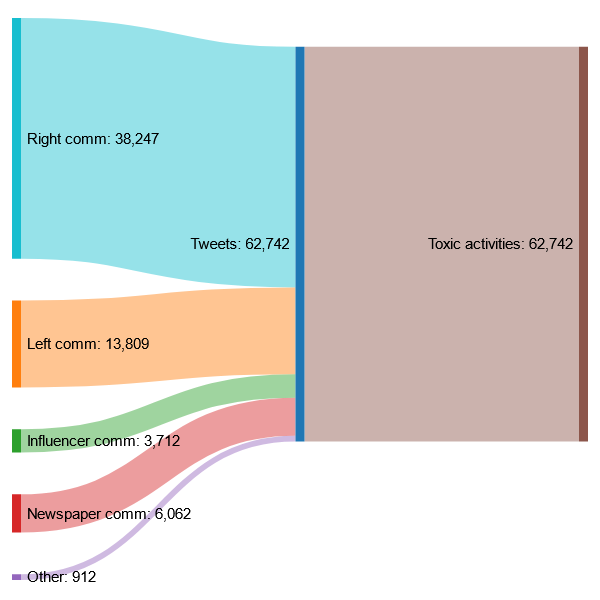

In [29]:
from IPython.display import Image
Image(r"C:\Users\gianl\Desktop\Gi\Supsi\Vaccines_Discussion_Italy\Italian\Files\toxic_flow.png")

### Toxic bad

In [12]:
bad = list(pd.read_csv(r"..\files\bad.csv")["screen_name"])
np.nanmedian(tweets_toxic[tweets_toxic["user_screen_name"].isin(bad)]["toxicity"])

0.0717155

### Toxic good

In [13]:
good = list(pd.read_csv(r"..\files\good.csv")["screen_name"])
np.nanmedian(tweets_toxic[tweets_toxic["user_screen_name"].isin(good)]["toxicity"])

0.025005542

### Toxic core

In [14]:
core = list(pd.read_csv(r"..\files\core.csv")["screen_name"])
np.nanmedian(tweets_toxic[tweets_toxic["user_screen_name"].isin(core)]["toxicity"])

0.039598234

# Toxicity and conspiracy

In [18]:
conspiracy = pd.read_csv(r"..\files\tweets\result_cred_score_thresh_10.csv", lineterminator="\n", encoding="utf-8", low_memory=False)
conspiracy.head()

,Unnamed: 0,user_screen_name,number_of_urls,HIGH,LOW,UNKW,SOCIAL,conspiracy_score
0,0,infoitinterno,17471,33,17267,171,0,1.0
1,1,Paolo90777,18,0,5,0,13,1.0
2,2,giuseppecarta73,17,0,1,15,1,1.0
3,3,ZiaGabriella1,11,0,7,3,1,1.0
4,4,lapillo1,36,0,3,1,32,1.0


In [19]:
toxic_merged_conspiracy = toxic_merged.merge(conspiracy, on="user_screen_name", how="right")
toxic_merged_conspiracy = toxic_merged_conspiracy[toxic_merged_conspiracy["id"].notna()]
toxic_merged_conspiracy

,text,toxicity,id,user_screen_name,urls,hashtags,created_at,in_reply_to_screen_name,rt_created_at,quoted_status_id,...,dates,name,community,Unnamed: 0,number_of_urls,HIGH,LOW,UNKW,SOCIAL,conspiracy_score
0,«L’omosessualità è una malattia mentale causat...,0.494545,1.291542e+18,infoitinterno,"[{'url': 'https://t.co/VI4dmR4veh', 'expanded_...",[],Fri Aug 07 01:11:34 +0000 2020,NaN,NaN,NaN,...,0.122449,infoitinterno,3.0,0,17471,33,17267,171,0,1.0
1,"“L’omosessualità è una malattia, causata dai v...",0.618262,1.291541e+18,infoitinterno,"[{'url': 'https://t.co/Y5KC8Sc2dY', 'expanded_...",[],Fri Aug 07 01:06:30 +0000 2020,NaN,NaN,NaN,...,0.122449,infoitinterno,3.0,0,17471,33,17267,171,0,1.0
2,“Speriamo che il vaccino la levi dalle p****”:...,0.534307,1.362839e+18,infoitinterno,"[{'url': 'https://t.co/SfF4TUeiso', 'expanded_...",[],Fri Feb 19 19:00:05 +0000 2021,NaN,NaN,NaN,...,0.060128,infoitinterno,3.0,0,17471,33,17267,171,0,1.0
3,Paragone contro con Morani Pd | “Sei nazista n...,0.502630,1.387169e+18,infoitinterno,"[{'url': 'https://t.co/v4CPO3sJVV', 'expanded_...",[],Tue Apr 27 22:18:15 +0000 2021,NaN,NaN,NaN,...,0.037710,infoitinterno,3.0,0,17471,33,17267,171,0,1.0
6,"gustinicchi Se non è così, è il contrario: oss...",0.630413,1.238114e+18,ZiaGabriella1,[],[],Thu Mar 12 14:44:15 +0000 2020,NaN,Wed Mar 11 23:56:18 +0000 2020,NaN,...,0.101929,ZiaGabriella1,4.0,3,11,0,7,3,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42189,"""FANNO SCHIFO! SFRUTTANO I MORTI PER SPECULARE...",0.581059,1.315318e+18,stCroazia,"[{'url': 'https://t.co/xsjTQs5Cr3', 'expanded_...",[],Sun Oct 11 15:48:27 +0000 2020,NaN,NaN,NaN,...,0.084477,NaN,NaN,9412,10,0,0,0,10,NaN
42204,fattoquotidiano machissenefrega ! Girasse pure...,0.503506,1.382787e+18,Scubamanu,[],"[{'text': 'machissenefrega', 'indices': [17, 3...",Thu Apr 15 20:05:42 +0000 2021,fattoquotidiano,NaN,NaN,...,0.046465,Scubamanu,3.0,9427,10,0,0,8,2,NaN
42267,Vorrei vederli quelli che vogliono licenziare ...,0.496888,1.343967e+18,chierici1950,[],[],Tue Dec 29 17:08:08 +0000 2020,NaN,NaN,NaN,...,0.068919,chierici1950,4.0,9490,10,0,0,10,0,NaN
42268,"conte, HAI FALLITO SUL PRIMO GOVERNO, SUI DELI...",0.494545,1.353266e+18,chierici1950,[],[],Sun Jan 24 08:56:54 +0000 2021,NaN,Sun Jan 24 08:18:06 +0000 2021,NaN,...,0.078109,chierici1950,4.0,9490,10,0,0,10,0,NaN


In [32]:
toxic_merged_conspiracy.drop_duplicates(subset=["user_screen_name"], inplace=True)
print(len(toxic_merged_conspiracy[toxic_merged_conspiracy["conspiracy_score"]>0.49]))
print(len(toxic_merged_conspiracy))

1691
4892


# Toxicity and centrality

In [33]:
user_ev = pd.read_csv("../files/networks/user_ev_centrality.csv")
user_deg = pd.read_csv("../files/networks/user_deg_centrality.csv")

In [34]:
toxic_merged_centrality = toxic_merged.merge(user_ev, left_on="user_screen_name", right_on="name", how="left")
toxic_merged_centrality = toxic_merged_centrality[toxic_merged_centrality["ev"].notna()]
toxic_merged_centrality = toxic_merged_centrality.merge(user_deg, left_on="user_screen_name", right_on="name", how="left")
toxic_merged_centrality = toxic_merged_centrality[toxic_merged_centrality["deg_cen"].notna()]
toxic_merged_centrality.drop_duplicates(subset=["user_screen_name"], inplace=True)
toxic_merged_centrality[["user_screen_name","dates","ev","deg_cen"]].corr()

,dates,ev,deg_cen
dates,1.000000,0.000134,-0.001533
ev,0.000134,1.000000,0.623230
deg_cen,-0.001533,0.623230,1.000000


# Toxicity and activities

In [6]:
original = tweets_toxic[tweets_toxic["in_reply_to_screen_name"].isna() & tweets_toxic["rt_created_at"].isna() & tweets_toxic["quoted_status_id"].isna()]
reply = tweets_toxic[tweets_toxic["in_reply_to_user_id"].notna() & tweets_toxic["quoted_status_id"].isna()]
retweet = tweets_toxic[tweets_toxic["rt_created_at"].notna()]
quote = tweets_toxic[tweets_toxic["quoted_status_id"].notna() & tweets_toxic["rt_created_at"].isna()]
print(np.median(original["toxicity"]))
print(np.mean(original["toxicity"]))
print("...")
print(np.median(reply["toxicity"]))
print(np.mean(reply["toxicity"]))
print("...")
print(np.median(retweet["toxicity"]))
print(np.mean(retweet["toxicity"]))
print("...")
print(np.median(quote["toxicity"]))
print(np.mean(quote["toxicity"]))

0.032902762
0.07924343726228576
...
0.08447654
0.13268079097035027
...
0.058130227
0.10740150242028106
...
0.064523295
0.12762508815160728


In [21]:
pd.Series(reply[reply["toxicity"]>=0.5]["in_reply_to_screen_name"]).value_counts().sort_values(ascending=False)

matteosalvinimi    494
robersperanza      362
LegaSalvini        280
matteorenzi        239
GiuseppeConteIT    225
                  ... 
TrapJaw159           1
__valfoy             1
mavelerick           1
Ansa_Fvg             1
sarabrgrx            1
Name: in_reply_to_screen_name, Length: 7093, dtype: int64

In [22]:
reply[(reply["in_reply_to_screen_name"] == "matteosalvinimi") & (reply["toxicity"]>=0.5)]

,text,toxicity,id,user_screen_name,urls,hashtags,created_at,in_reply_to_screen_name,rt_created_at,quoted_status_id,in_reply_to_user_id,date,count_status,dates
702,"matteosalvinimi avete vinto nelle campagne, do...",0.502328,1222261848805978121,BIGPHARMAPAYSME,[],[],Tue Jan 28 20:55:07 +0000 2020,matteosalvinimi,NaN,NaN,270839361.0,2020-01-28,33,0.069718
4910,matteosalvinimi Tu sei uno sciacallo a scriver...,0.721206,1223164321318031360,DeejayDropsy,[],[],Fri Jan 31 08:41:14 +0000 2020,matteosalvinimi,NaN,NaN,270839361.0,2020-01-31,1,0.089041
11810,"matteosalvinimi Ah, cazzo, ti sei ricordato ch...",0.808681,1218435451767357441,OsconiL,[],[],Sat Jan 18 07:30:23 +0000 2020,matteosalvinimi,NaN,NaN,270839361.0,2020-01-18,7,0.076111
51564,matteosalvinimi fabrizio_sn E cosa cambia? Sie...,0.595890,1312292065703858176,darioconte66,[],[],Sat Oct 03 07:23:04 +0000 2020,matteosalvinimi,NaN,NaN,270839361.0,2020-10-03,302,0.044062
52016,matteosalvinimi Qualcuno un cazzo... dillo il ...,0.502630,1312258450861305856,fab83365605,[],[],Sat Oct 03 05:09:29 +0000 2020,matteosalvinimi,NaN,NaN,270839361.0,2020-10-03,16,0.044062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3775399,"matteosalvinimi Sei scemo o lo fai, se lo Sput...",0.536343,1392511596501639177,aldoalpegiani,[],[],Wed May 12 16:06:50 +0000 2021,matteosalvinimi,NaN,NaN,270839361.0,2021-05-12,23,0.043719
3817098,matteosalvinimi E' TUTTO UN PO' ALLA CAZZO DI ...,0.796961,1393162953910800388,paolosarti69,[],[],Fri May 14 11:15:06 +0000 2021,matteosalvinimi,NaN,NaN,270839361.0,2021-05-14,360,0.038912
3824977,matteosalvinimi La lega vota a favore dei vacc...,0.512446,1393243867772821507,ferillo2,[],[],Fri May 14 16:36:37 +0000 2021,matteosalvinimi,NaN,NaN,270839361.0,2021-05-14,488,0.038912
3838942,matteosalvinimi continuate a fare distrazione ...,0.618262,1393493466168975361,RobertoAli20,[],[],Sat May 15 09:08:26 +0000 2021,matteosalvinimi,NaN,NaN,270839361.0,2021-05-15,155,0.038912


# Toxicity and Suspended

In [23]:
import glob
df_suspended = pd.DataFrame()
path_suspended = glob.glob(r"C:\Users\gianl\Desktop\Gi\Supsi\Vaccines_Discussion_Italy\Italian\script_directory_output\suspended_users\out*.csv")
for i in path_suspended:
    temp = pd.read_csv(i, lineterminator="\n", low_memory=False, encoding="utf-8")
    df_suspended = pd.concat([df_suspended, temp], ignore_index=True)

In [24]:
df_suspended.drop_duplicates(subset=["name"], inplace=True)
df_suspended

,name,status
0,marzia38580873,"[{'code': 50, 'message': 'User not found.'}]"
1,Ivan__soli,ok
2,pat09_04,"[{'code': 50, 'message': 'User not found.'}]"
3,claudeger55,ok
4,ennioflyano,ok
...,...,...
839459,CollectifVrai,ok
839460,Mche10024327,ok
839461,albertotozzi3,"[{'code': 50, 'message': 'User not found.'}]"
839462,HanKer09062021,ok


In [25]:
issue = df_suspended[df_suspended["status"].str.contains("code")]

In [26]:
suspended_conspiracy = toxic_merged_conspiracy[toxic_merged_conspiracy["user_screen_name"].isin(issue["name"])]

In [27]:
np.mean(suspended_conspiracy["toxicity"])

0.6009041446797386

In [28]:
np.median(suspended_conspiracy["toxicity"])

0.57816684

In [30]:
print(np.mean(suspended_conspiracy["conspiracy_score"]))
print(np.nanmedian(suspended_conspiracy["conspiracy_score"]))

0.4344790301441678
0.48


In [60]:
pd.Series(communities[communities["name"].isin(issue["name"])]["community"]).value_counts().sort_values(ascending=False) #2 influ, 0 good, 4 bad, 3 paper

2       4810
0       3091
4       2490
3       1665
34       919
        ... 
3113       1
3158       1
3013       1
2172       1
165        1
Name: community, Length: 697, dtype: int64

In [64]:
print(pd.Series(communities[communities["name"].isin(issue["name"])]["community"]).value_counts().sort_values(ascending=False).sum()) #2 influ, 0 good, 4 bad, 3 paper
print(pd.Series(communities[communities["name"].isin(issue["name"])]["community"]).value_counts().sort_values(ascending=False)[:4].sum()) #2 influ, 0 good, 4 bad, 3 paper
(12056 / 22757)*100

15827
12056


52.97710594542339